
- Kemil Herath- MIS 776
- Assignment 03
- Predicting Median value of owner-occupied homes in 1000's

##### Data Columns
- CRIM: per capita crime rate by town 
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS: proportion of non-retail business acres per town
- RIVER: Yes if the tract is bordered by the Charles river, No if not. 
- NOX: nitric oxides concentration (parts per 10 million) 
- RM: average number of rooms per dwelling 
- AGE: proportion of owner-occupied units built prior to 1940 
- DIS: weighted distances to five Boston employment centres 
- RAD: index of accessibility to radial highways 
- TAX: full-value property-tax rate per 10,000 
- PRATIO: pupil-teacher ratio by town 
- LSTAT: % lower status of the population 
- MEDV: Median value of owner-occupied homes in 1000's (Target)



In [1]:
### Load necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
## Load the dataset and read the data into a pandas dataframe 
datHousing = pd.read_csv('Housing.csv')

#### 1. Do exploratory analysis to ensure the data is loaded correctly and values are reasonable.

In [3]:
datHousing.head()

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV
0,3.32105,0.0,19.58,Yes,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4
1,1.12658,0.0,19.58,Yes,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3
2,1.41385,0.0,19.58,Yes,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0
3,3.53501,0.0,19.58,Yes,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6
4,1.27346,0.0,19.58,Yes,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0


In [4]:
datHousing.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
datHousing.isna().sum()

CRIM      0
ZN        0
INDUS     0
RIVER     0
NOX       0
RM        0
AGE       0
DIS       0
RAD       0
TAX       0
PRATIO    0
LSTAT     0
MEDV      0
dtype: int64

In [6]:
datHousing.dtypes

CRIM      float64
ZN        float64
INDUS     float64
RIVER      object
NOX       float64
RM        float64
AGE       float64
DIS       float64
RAD         int64
TAX         int64
PRATIO    float64
LSTAT     float64
MEDV      float64
dtype: object

#### 2. What is the mean value for MEDV? 

In [7]:
round(datHousing.MEDV.mean(),2)

22.53

**The mean of MEDV variable is 22.53**

#### 3. Create a dummy variable for RIVER called RIVERCODE where 'No' is coded as 0 and 'Yes' is 1.

In [8]:
datHousing['RIVERCODE'] = pd.get_dummies(datHousing.RIVER, drop_first=True)

In [9]:
# Verify this column has been added
datHousing.head()

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV,RIVERCODE
0,3.32105,0.0,19.58,Yes,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4,1
1,1.12658,0.0,19.58,Yes,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3,1
2,1.41385,0.0,19.58,Yes,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0,1
3,3.53501,0.0,19.58,Yes,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6,1
4,1.27346,0.0,19.58,Yes,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0,1


In [10]:
datHousing.columns

Index(['CRIM', 'ZN', 'INDUS', 'RIVER', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PRATIO', 'LSTAT', 'MEDV', 'RIVERCODE'],
      dtype='object')

#### 3.1 Check the mean value of the RIVERCODE 
- it should be 0.69

In [11]:
datHousing.RIVERCODE.mean()

0.0691699604743083

#### 4. Create a correlation table for all the numeric columns in the dataframe.

In [12]:
numeric_values = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PRATIO', 
                  'LSTAT', 'MEDV']

In [13]:
datHousing[numeric_values].corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536
PRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,0.374044,-0.507787


#### 4.1 Do you see any multicollinearity issues? 

- Features like TAX and RAD, AGE and NOX, INDUS and TAX shows moderate to high correlation amongst each other indicating multicollinearity. 

#### 4.2 Do you see any reason to try a Principal Component Analysis? 

- INDUS and NOX are highly positively correlated, which makes sence to have a high nox in the air close to industrial areas. However, I do not think these would be good features to combine since they measure completely different things. 
- TAX and RAD are also highly positively correlated, which also makes sence because location increases value of property, hence increasing the property tax. THese features also measure completely different things hence, not ideal to run PCA. 
- Same goes for INDUS and TAX

****Features ZN and INDUS are intreesting:****

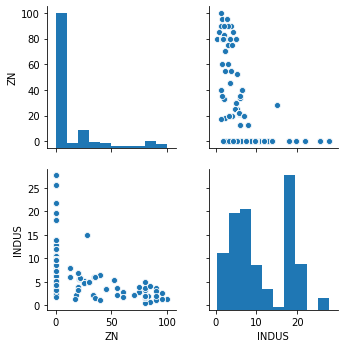

In [14]:
# ZN and INDUS
sns.pairplot(datHousing[['ZN','INDUS']]);

- ZN and INDUS are **not** very highly correlated (-0.53). But they both measure large plots of land. Hence, they can be combined into one variable using PCA. But important fact to consider, they are not very highly correlated. 

**4.4 Which predictors have the highest and lowest correlations with MEDV?**
- Features such as RM, LSTAT, PRATIO, INDUS, NOX, and TAX shows moderate to high correlation to MEDV
- Features like RIVERCODE, DIS, RAD, AGE, CRIM, ZN shows the lowest correlation to MEDV

In [15]:
datHousing.corr()['MEDV'].sort_values(ascending=False)

MEDV         1.000000
RM           0.695360
ZN           0.360445
DIS          0.249929
RIVERCODE    0.175260
AGE         -0.376955
RAD         -0.381626
CRIM        -0.388305
NOX         -0.427321
TAX         -0.468536
INDUS       -0.483725
PRATIO      -0.507787
LSTAT       -0.737663
Name: MEDV, dtype: float64

**4.5 Why is this important?**
- Features that are highly correlated to the target can lead to a better prediction model. 
- Highly correlated predictors leads to a model that can describe the variation of the target much better (high R2 value). 
- However, multicollinearity is bad, it can bring an opposite efeect to the accuracy of the model. 

#### 5. Create a correlation plot matrix using the same data as above. 

<Figure size 1440x1296 with 0 Axes>

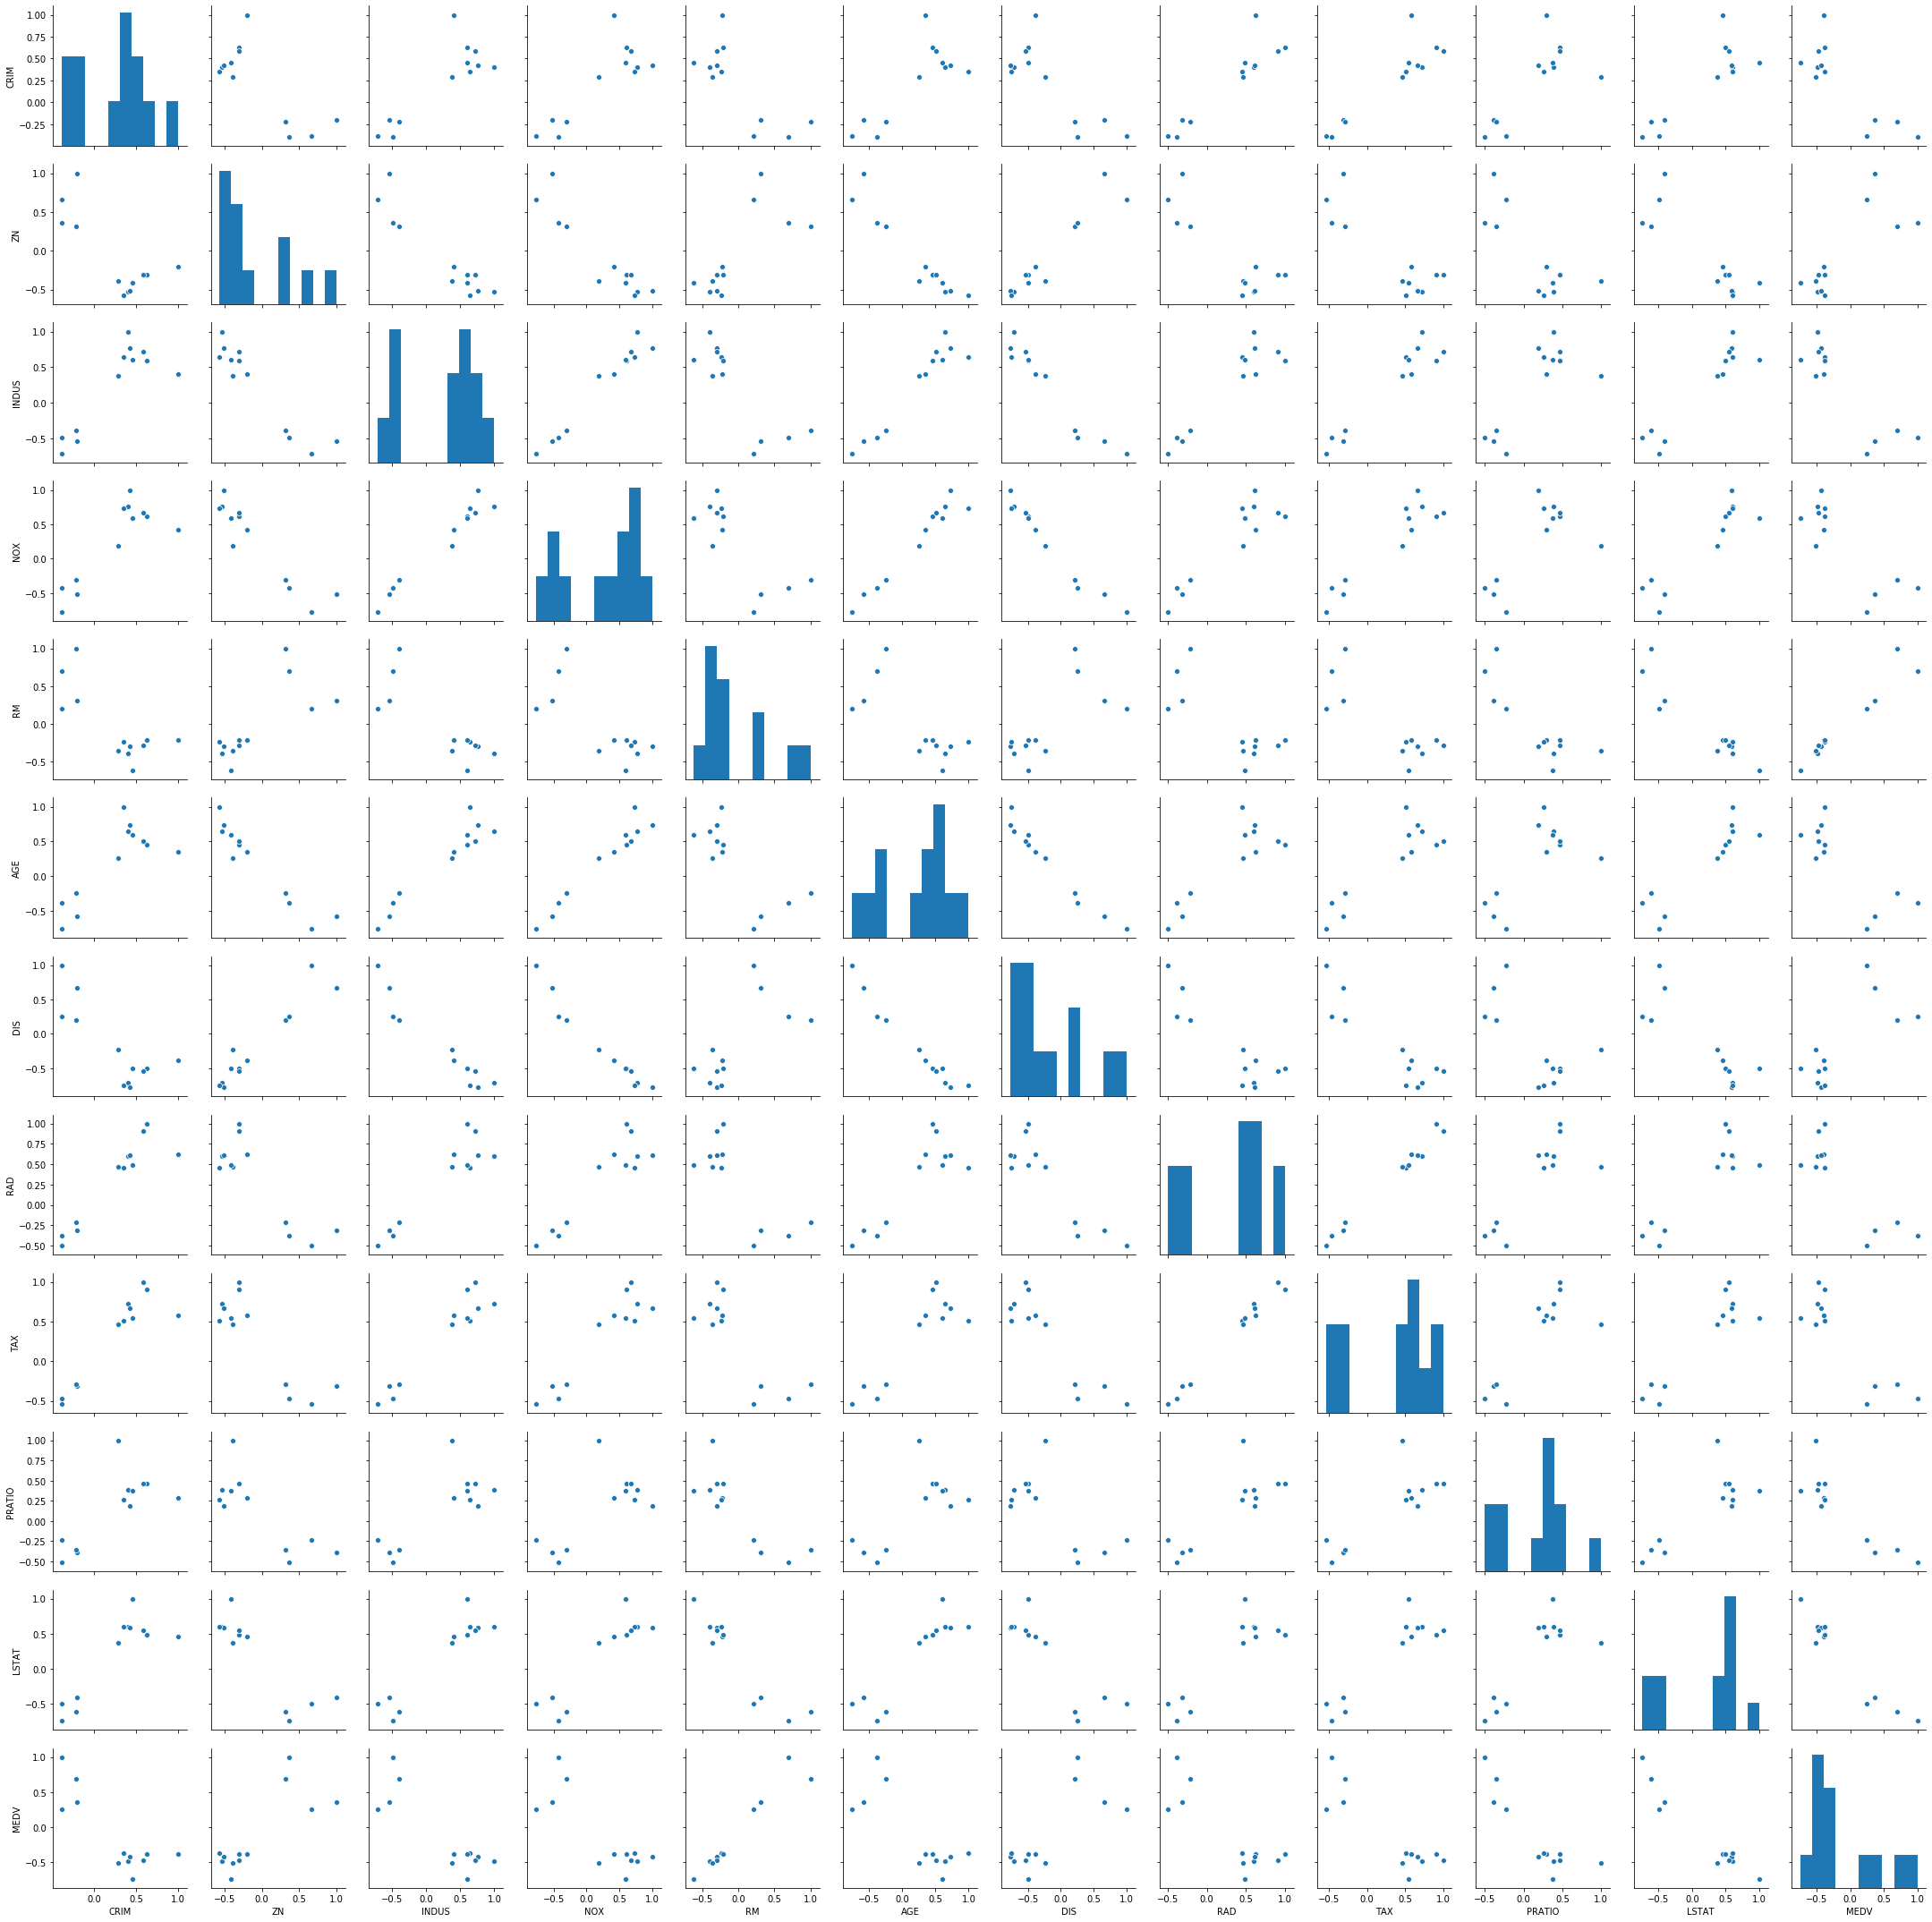

In [16]:
plt.figure(figsize=(20,18))

sns.pairplot(datHousing[numeric_values].corr());

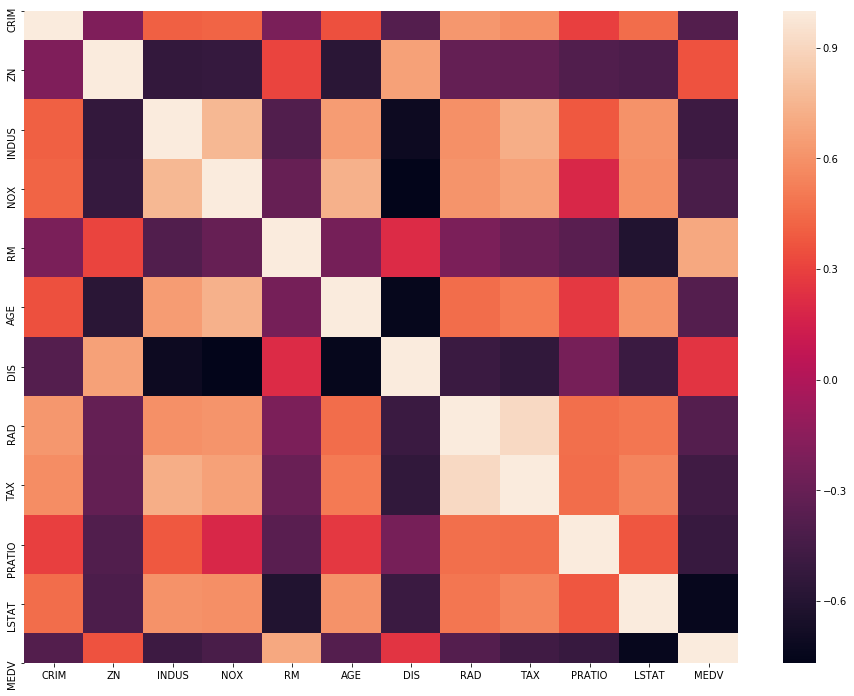

In [17]:
plt.figure(figsize=(16,12))
sns.heatmap(datHousing[numeric_values].corr());


#### 5.1 Focus on the relationships with MEDV. 

- RM is moderately positively correlated to MEDV (target). It is also the highest correlated feature. 
- LSTAT and PRATIO are moderately negatively correlated to MEDV (target)
- Features like INDUS, NOX and TAX also show close to moderate correlation to MEDV

#### 5.2 Do you see any potential issues such as non-linear relationships?
- There are many values with small correlation values (0.2 and 0.3). 

- When focusing on the MEDV feature:
    - All the features seem to be linearly related.
    - CRIM feature seems to have a non-linear relationship with MEDV

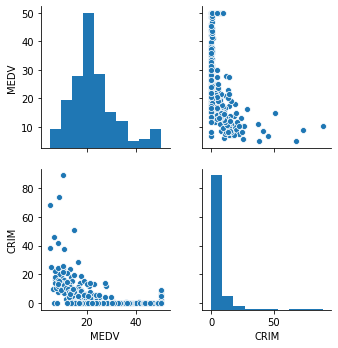

In [18]:
sns.pairplot(datHousing[['MEDV','CRIM']]);

Above pairplots further illustrates the non-linear relationship between MEDV and CRIM

#### 6. Split the data into a training and testing set where 25% of the data is in the testing partition. 
   - Use a random seed value of 42 to ensure that we all have the same partition structure.

In [19]:
datHousing.columns

Index(['CRIM', 'ZN', 'INDUS', 'RIVER', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PRATIO', 'LSTAT', 'MEDV', 'RIVERCODE'],
      dtype='object')

In [20]:
X = datHousing.drop(['MEDV','RIVER'], axis= 1)
y = datHousing['MEDV']

print(X.shape)
print(y.shape)

(506, 12)
(506,)


In [21]:
# Import module 
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### 7. Create a regression model predicting MEDV using all of the other numeric predictors. 
- Remember to use RIVERCODE instead of RIVER.

In [22]:
# Import LInear regression module 
from sklearn.linear_model import LinearRegression

# Instantiate the model 
linreg = LinearRegression()

# Fit the model 
linreg.fit(X_train, y_train)

# make predictions using the "test" data
y_pred = linreg.predict(X_test)

#### 8.  Answer the following questions based on this model:
##### a. What percentage of the variance in MEDV can be explained by this model?

In [24]:
# Import r2 score and mse libraries 
from sklearn.metrics import mean_squared_error, r2_score

# Compute r2 score and print result 
print("Variance of MEDV explained by model: ", (r2_score(y_test,y_pred) * 100).round())

Variance of MEDV explained by model:  71.0


**As we can see about 71% of the variance in MEDV can be explained by this model.**

In [41]:
linreg.score(X_test, y_test)

0.7063469514221579

#### b. Assuming all other predictors are held constant, what effect does being by the river have on the median house price?

In [25]:
#print the coefficients. 
pd.Series(linreg.coef_, index=X_train.columns).sort_values(ascending=False).round(2)

RM            3.61
RIVERCODE     3.25
RAD           0.25
ZN            0.05
AGE           0.01
INDUS        -0.01
TAX          -0.01
CRIM         -0.13
LSTAT        -0.57
PRATIO       -0.94
DIS          -1.42
NOX         -15.20
dtype: float64

As we can see by the coefficiant score, **being by the river can increase the median house price by 3.25 times.** Than not being by the river.

#### c. Does the age of the home seem to matter?

According to the coefficiant score, **age has very little to no effect (0.01 coef score)** on the median price of a house. 

#### 9. What is the regression equation inferred by this model?

In [26]:
# Get the intercept value of the model 
intercept = linreg.intercept_

intercept

39.4381617654267

In [27]:
# Get the coefficiants 
coefs = linreg.coef_

coefs

array([-1.33278556e-01,  4.76246661e-02, -9.38379748e-03, -1.51989602e+01,
        3.61438075e+00,  7.18049856e-03, -1.42494762e+00,  2.45997926e-01,
       -1.10542534e-02, -9.36073795e-01, -5.65571567e-01,  3.25211778e+00])

Linear regression equation -------> **b0 + b1X1 +b2X2 + ............ + bnXn**

In [28]:
print('Regression Equation described by this model: ','\n')
print(intercept,'+', end=' ')

for i in range(len(coefs)):
    print(coefs[i],X_test.columns[i],'+', end=' ')

Regression Equation described by this model:  

39.4381617654267 + -0.13327855594286625 CRIM + 0.04762466606200491 ZN + -0.009383797475490193 INDUS + -15.198960151673022 NOX + 3.6143807539465165 RM + 0.007180498563017701 AGE + -1.4249476163784378 DIS + 0.2459979262487978 RAD + -0.011054253363489329 TAX + -0.9360737946706733 PRATIO + -0.5655715670212856 LSTAT + 3.2521177787525666 RIVERCODE + 

#### 10. Generate a set of predictions using the training at and report the MSE of the model against the training data.

In [29]:
# Make prediction using the train set 
y_pred_train = linreg.predict(X_train)

In [30]:
# Compute MSE score and print result 
trainMSE = mean_squared_error(y_train,y_pred_train)
print("MSE of training data: ",trainMSE )

MSE of training data:  21.02509351445634


#### 11. Generate a set of predictions using the testing data and report the MSE of the model against the testing data?

In [31]:
# predictions for testing data is instantiated above

testMSE = mean_squared_error(y_test,y_pred)
# Compute MSE score and print result 
print("MSE of testing data: ", testMSE)

MSE of testing data:  27.138904602721755


#### 12. Compare the two MSE values. Is there any evidence of overfitting?

In [32]:
print("MSE of training data: ",trainMSE, 'vs.',
      "MSE of testing data: ", testMSE)

MSE of training data:  21.02509351445634 vs. MSE of testing data:  27.138904602721755


In [33]:
### Create a Pandas Dataframe to store MSE values for  train and test data
mse = pd.DataFrame()
model_dict = {'train':linreg}

for name, model in model_dict.items():
    mse.loc[name,'train'] = mean_squared_error(y_train,y_pred = model.predict(X_train))
    mse.loc[name,'test'] = mean_squared_error(y_test, y_pred=model.predict(X_test))
    
mse

,train,test
train,21.025094,27.138905


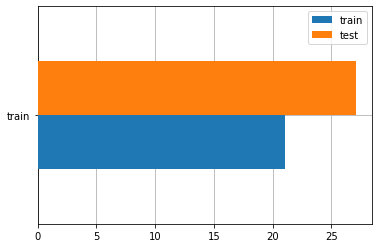

In [34]:
#Visualize the results
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax,zorder=3)
ax.grid(zorder=0)

- As we can see the MSE for testing is lightly higher, which can be the case usually.

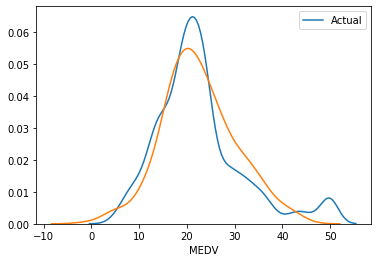

In [35]:
# Distribution plot for training data prediction 
ax1 = sns.distplot(datHousing['MEDV'], hist=False, label="Actual")
sns.distplot(y_pred_train, hist=False);

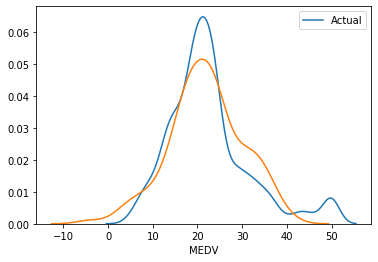

In [36]:
# Distribution plot for testing data prediction 
ax1 = sns.distplot(datHousing['MEDV'], hist=False, label='Actual')
sns.distplot(y_pred, hist=False);

- According to the distribution plots, both predictions (train data and test data) seems to explain the original value well. 
- The difference in MSE is about 6 with higher test error (27). 
- Given these factors we can conclude that **there is no evidance of overfitting.** 

#### 13. Using this model, what would we expect to be the median home price on a neighborhood given the following values:
a. CRIM = 1.28955
b. ZN = 0
c. INDUS = 18
d. RIVER = Yes
e. NOX = 0.862
f. RM = 5.22
g. AGE = 65.2
h. DIS = 2.05
i. RAD = 5
j. TAX = 399
k. PRATIO = 13.9
l. LSTAT = 18.3

In [177]:
cols = [i for i in X_train.columns]
coef = [i for i in linreg.coef_]
values = [1.28955,0,18,0.862,5.22,65.2,2.05,5,399, 13.9, 18.3,1]

In [178]:
print('{0:^20}{1:^15}{2:>20}{3:>20}'.format('Column','Coeffient','Values','biXi'))

biXi = []
for i in range(len(values)):
    biXi.append(coef[i] * values[i])
    print('{0:^20}{1:^15}{2:^25}{3:>15}'.format(cols[i], coef[i], values[i],coef[i] * values[i]))

       Column          Coeffient                 Values                biXi
        CRIM        -0.13327855594286625         1.28955         -0.17186936181612317
         ZN         0.04762466606200491            0                        0.0
       INDUS        -0.009383797475490193           18            -0.16890835455882347
        NOX         -15.198960151673022          0.862          -13.101503650742146
         RM         3.6143807539465165          5.22           18.867067535600814
        AGE         0.007180498563017701          65.2           0.4681685063087541
        DIS         -1.4249476163784378          2.05           -2.9211426135757974
        RAD         0.2459979262487978            5            1.2299896312439889
        TAX         -0.011054253363489329           399           -4.410647092032242
       PRATIO       -0.9360737946706733          13.9           -13.01142574592236
       LSTAT        -0.5655715670212856          18.3           -10.349959676489528
   

##### Median home price

In [184]:
print(linreg.intercept_ + sum(biXi))

19.120048722195804


**As we can see the Median home price is 19.12 in 1000's**

##### About $19,200